In [304]:
import pandas as pd

In [305]:
excel_file_path = "Dataset for People for their Blood Glucose Level with their Superficial body feature readings.csv.xlsx"

df = pd.read_excel(excel_file_path, sheet_name=0)



In [307]:
df.head(2)

,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N)
0,9,79,73,118,98,98.300707,99,0,0,N
1,9,80,73,119,102,98.300707,94,1,0,N


In [308]:
X = df[['Blood Glucose Level(BGL)', 'Diastolic Blood Pressure', 
        'Systolic Blood Pressure', 'Heart Rate', 'Body Temperature', 'SPO2']]

In [310]:
df['Diabetic'] = df['Diabetic/NonDiabetic (D/N)'].map({'D': 1, 'N': 0})
df['Hypertension'] = (df['Systolic Blood Pressure'] > 140) | (df['Diastolic Blood Pressure'] > 90)
df['HeartDisease'] = (df['Heart Rate'] > 100)  # 심박수 100 이상이면 위험
df['LungDisease'] = (df['SPO2'] < 92)  # 산소포화도 92% 미만이면 위험

In [311]:
y = df[['Diabetic', 'Hypertension', 'HeartDisease', 'LungDisease']]

In [312]:
from sklearn.preprocessing import StandardScaler

In [313]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [315]:
from sklearn.model_selection import train_test_split

In [317]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
y_test=y_test.astype(int)
y_train=y_train.astype(int)

In [318]:
from sklearn.ensemble import RandomForestClassifier

In [319]:
classifier=RandomForestClassifier(n_estimators=50,max_depth=3,min_samples_split=5)


In [320]:
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=50)

In [321]:
y_pred=classifier.predict(X_test)

In [322]:
import numpy as np
y_test=np.array(y_test)

In [323]:
print("🔹 y_test 타입:", type(y_test))
print("🔹 y_pred 타입:", type(y_pred))

print("\n🔹 `y_test` 예제 출력:")
print(y_test[:5])  # 상위 5개 출력

print("\n🔹 `y_pred` 예제 출력:")
print(y_pred[:5])  # 상위 5개 출력


🔹 y_test 타입: <class 'numpy.ndarray'>
🔹 y_pred 타입: <class 'numpy.ndarray'>

🔹 `y_test` 예제 출력:
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]

🔹 `y_pred` 예제 출력:
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [324]:
from sklearn.metrics import classification_report

In [325]:
classification_report(y_test,y_pred)

c:\Users\vhzkf\anaconda3\envs\hi\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vhzkf\anaconda3\envs\hi\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vhzkf\anaconda3\envs\hi\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vhzkf\an

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      3327\n           1       1.00      0.25      0.40        24\n           2       1.00      1.00      1.00       575\n           3       0.00      0.00      0.00         0\n\n   micro avg       0.99      1.00      0.99      3926\n   macro avg       0.75      0.56      0.60      3926\nweighted avg       0.99      1.00      0.99      3926\n samples avg       0.98      0.98      0.98      3926\n'

In [326]:
import numpy as np

# 클래스별 데이터 개수 확인
unique, counts = np.unique(y_train, return_counts=True)
print("🔹 클래스별 데이터 개수:")
for cls, count in zip(unique, counts):
    print(f"Class {cls}: {count}개")


🔹 클래스별 데이터 개수:
Class 0: 38581개
Class 1: 15719개


In [327]:
train_accuracy = classifier.score(X_train, y_train)
test_accuracy = classifier.score(X_test, y_test)

print(f"✅ 학습 데이터 정확도: {train_accuracy:.4f}")
print(f"✅ 테스트 데이터 정확도: {test_accuracy:.4f}")


✅ 학습 데이터 정확도: 0.9861
✅ 테스트 데이터 정확도: 0.9850


In [328]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
print(f"✅ 5-Fold 교차 검증 평균 정확도: {cv_scores.mean():.4f}")


✅ 5-Fold 교차 검증 평균 정확도: 0.9864


In [329]:
new_patient_data = pd.DataFrame([[80, 75, 120, 95, 37.0, 95]], columns=['Blood Glucose Level(BGL)', 'Diastolic Blood Pressure','Systolic Blood Pressure', 'Heart Rate', 'Body Temperature', 'SPO2'])

In [330]:
new_patient_data_scaled = scaler.transform(new_patient_data)

In [331]:
prediction = classifier.predict(new_patient_data_scaled)
print(f"예측결과: {prediction}")


예측결과: [[1 0 0 0]]


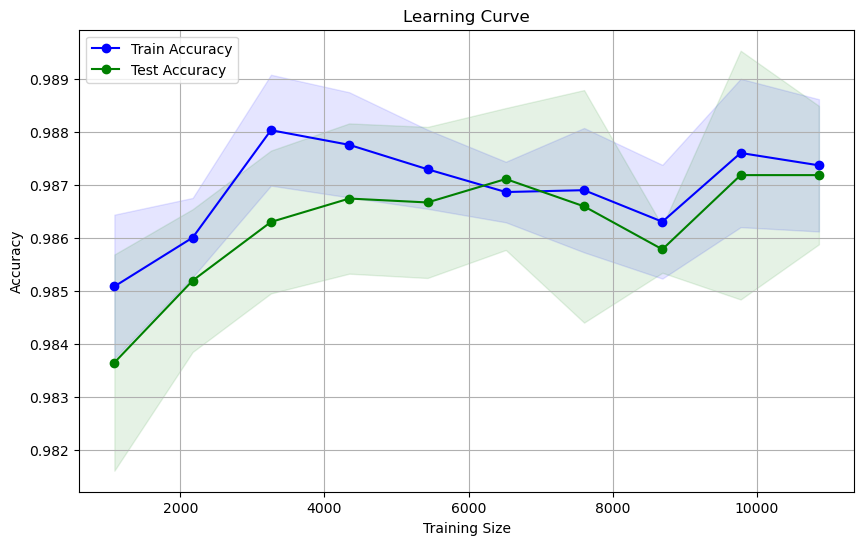

In [332]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


classifier = RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=50)

# 학습 곡선 계산
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# 평균과 표준편차 계산
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# 학습 곡선 시각화
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Train Accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Test Accuracy', color='green', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [333]:
import joblib

In [335]:
joblib.dump(classifier, 'health_modelAI.pkl')

['health_modelAI.pkl']